<a href="https://colab.research.google.com/github/chakrik1729/machine/blob/master/fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (3.2.1)


In [29]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import tensorflow_datasets as tfds


In [30]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt
#import progress bar display

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

In [32]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True , with_info=True)
train_dataset, test_dataset = dataset['train'],dataset['test']

In [33]:
print(len(train_dataset))
print(len(test_dataset))

60000
10000


In [34]:
class_names = ['T-shirt/top', 'Trouser' , 'Pullover' , 'Dress', 'Coat', 'Sandal', 'Shrt' , 'Sneaker' , 'Bag', 'Ankle boot']

In [35]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))


Number of training examples: 60000
Number of test examples:     10000


In [36]:
#preprocess the data
def normalize(images,labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels
train_dataset= train_dataset.map(normalize)
test_dataset= test_dataset.map(normalize)

In [37]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(512, activation= tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)

])

In [38]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [39]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)


In [40]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4708 - accuracy: 0.8317
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3567 - accuracy: 0.8692
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3182 - accuracy: 0.8823
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2999 - accuracy: 0.8894
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2803 - accuracy: 0.8965


In [41]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.3458 - accuracy: 0.8750
Accuracy on test dataset: 0.875


In [42]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [43]:
print(predictions.shape)

(32, 10)


In [44]:
print(predictions[0])

[6.5246882e-06 1.5368877e-07 2.3229630e-03 9.1217856e-08 9.9688548e-01
 1.3091336e-09 7.6936826e-04 7.5804857e-10 1.5406255e-05 4.5374868e-09]


In [45]:
np.argmax(predictions[0])

4

In [46]:
test_labels[0]

4

In [47]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

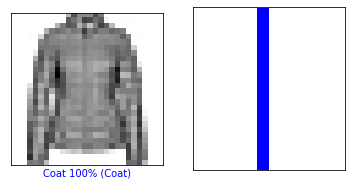

In [48]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

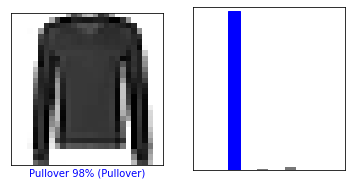

In [49]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

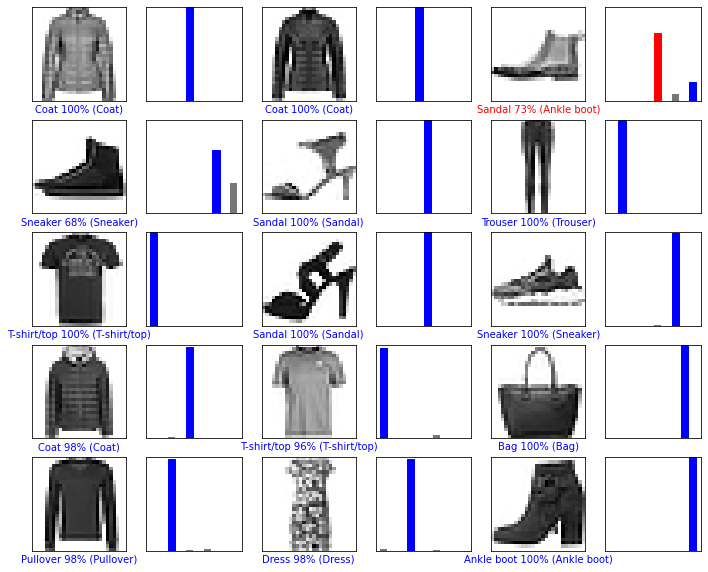

In [50]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [51]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [52]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [53]:
predictions_single = model.predict(img)

print(predictions_single)

[[6.5246882e-06 1.5368877e-07 2.3229630e-03 9.1217856e-08 9.9688548e-01
  1.3091336e-09 7.6936750e-04 7.5804857e-10 1.5406255e-05 4.5374775e-09]]


4

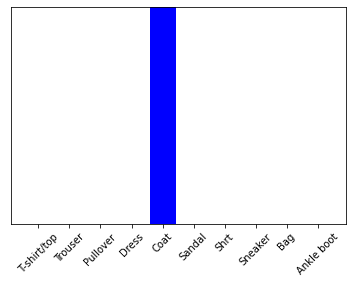

In [54]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])